# **앙상블(Ensemble): 수업실습용**

## **1. 라이브러리 로드**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

# 데이터 전처리 패키지
from sklearn.model_selection import train_test_split

# 모델 패키지
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 모델 평가 패키지
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 마이너스 기호(-) 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# # 한글 폰트 사용하기
# plt.rc('font', family='Malgun Gothic')

----------------------------------------------------------------------------------

## **2. 데이터 로드**

**Breast Cancer Coimbra**
- 금융 기관에서 고객의 은행 서비스 이용에 관한 정보를 포함하고 있는 데이터셋
- 총 feature: 14개
- 총 관측치 개수: 5000개
- https://github.com/gchoi/Dataset/blob/master/UniversalBank.csv

In [2]:
#csv파일 로드
bank_df = pd.read_csv("UniversalBank.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# 데이터셋 확인
# defaut로 앞에서 5개의 데이터를 출력
bank_df.shape

(5000, 14)

In [4]:
# 각 column명 확인
bank_df.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
# 데이터셋의 요약 정보 확인
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# 결측치 확인
bank_df.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [7]:
# column 별 기본적인 통계 값 확인
bank_df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# target과 x로 분리
# ID, ZIPCode, PersonalLoan은 분석에 불필요한 column이므로 제거
data = bank_df.drop(['ID', 'ZIPCode', 'PersonalLoan'], axis =1)
y = bank_df['PersonalLoan']
np.bincount(y)

array([4520,  480], dtype=int64)

----------------------------------------------------------------------------------

## **3. 데이터 전처리**

### **3-1. x 레이블 인코딩**
- 범주형 또는 연속형 변수로 인코딩 하는 전처리 과정

In [9]:
#Education 범주형으로 변경
data['Education'] = data['Education'].replace([1,2,3],['Under','Grad','Prof'])
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,Under,0,1,0,0,0
1,45,19,34,3,1.5,Under,0,1,0,0,0
2,39,15,11,1,1.0,Under,0,0,0,0,0
3,35,9,100,1,2.7,Grad,0,0,0,0,0
4,35,8,45,4,1.0,Grad,0,0,0,0,1


- 원-핫 인코딩(One-Hot Encoding)
    - Education 범주에 대해 이진으로 나타낼 수 있는 표현으로 변경 -> column 생성됨 ['Education_Under','Education_Grad',Education_Prof']

In [10]:
# 범주형 데이터를 one-hot encoding
data = pd.get_dummies(data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']], columns=['Education'], drop_first = True)
data.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Education_Prof,Education_Under
0,25,1,49,4,1.6,0,1,0,0,0,False,True
1,45,19,34,3,1.5,0,1,0,0,0,False,True
2,39,15,11,1,1.0,0,0,0,0,0,False,True
3,35,9,100,1,2.7,0,0,0,0,0,False,False
4,35,8,45,4,1.0,0,0,0,0,1,False,False


### **3-2. train, validation 데이터 셋 분할**
- test:train = 0.2:0.8 비율로 분할

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=123)

----------------------------------------------------------------------------------

## **4. 모델 구축**

### **4-1. Bagging**

- 배깅은 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregration)하는 방법
> 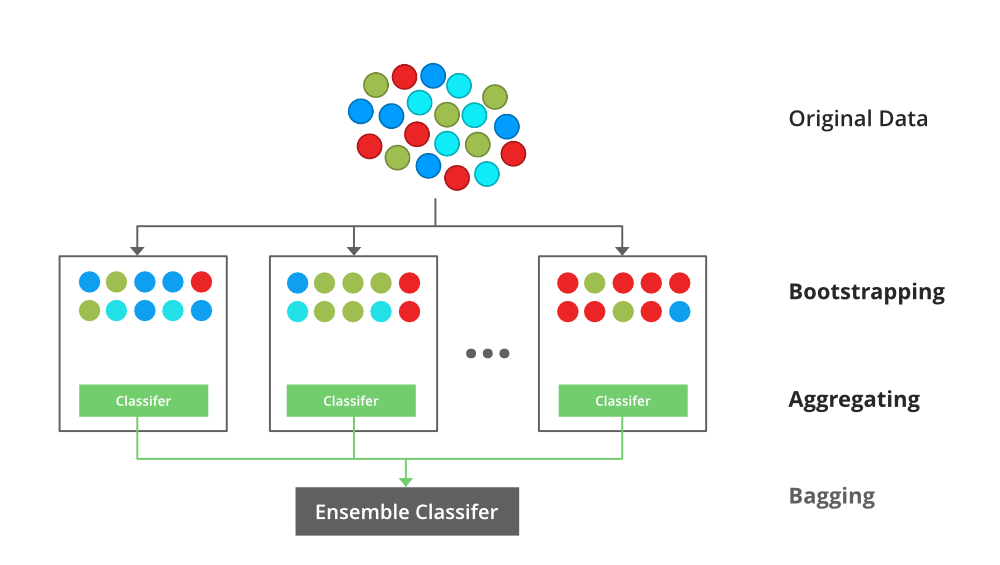
- 학습 데이터가 충분하지 않더라도 충분한 학습효과를 주어 높은 bias의 underfitting 문제나, 높은 variance로 인한 overfitting 문제를 해결하는데 도움을 줌

**(1) 모델 생성**

In [12]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500,
                           max_samples=1.0,
                           max_features=1.0,
                           bootstrap=True,
                           bootstrap_features=False,
                           random_state=1)
# 모델 학습
bagging.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=1)

**(2) confusion matrix**

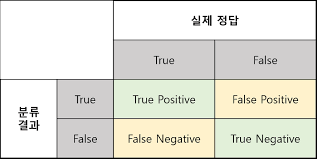

<Axes: >

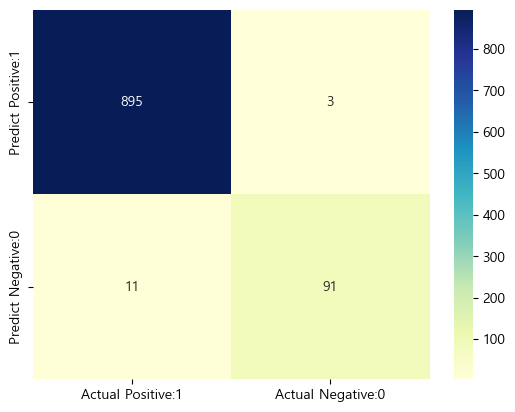

In [15]:
# 모델 예측
y_pred = bagging.predict(X_test)

# Confusion Matrix 출력
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [16]:
print('잘못 분류된 샘플 개수 : %d'%(y_test != y_pred).sum())
print('정확도 : %.3f'%accuracy_score(y_test, y_pred))
print('정밀도 : %.3f'%precision_score(y_true=y_test, y_pred=y_pred))
print('재현율 : %.3f'%recall_score(y_true=y_test, y_pred=y_pred))
print('F1 : %.3f'%f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수 : 14
정확도 : 0.986
정밀도 : 0.968
재현율 : 0.892
F1 : 0.929


**(3) ROC curve AUC 검정**
  - ROC (Receiver Operating Characteristic) curve란?
    - FPR (False positive rate)과 TPR (True Positive Rate)을 각각 x, y축으로 놓은 그래프
      - **TPR (True Positive Rate)**: 1인 케이스에 대해 1로 바르게 예측하는 비율 (Sensitivity)
      - **FPR (False positive rate)**: 0인 케이스에 대해 1로 틀리게 예측하는 비율 (1-Specificity)
> 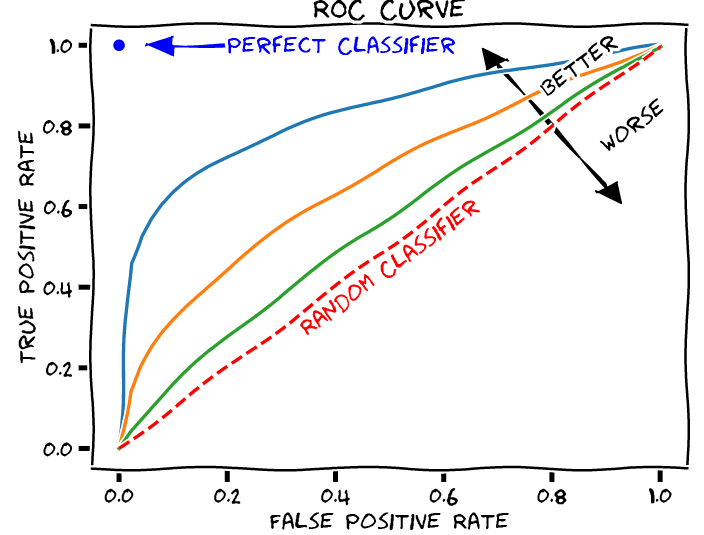

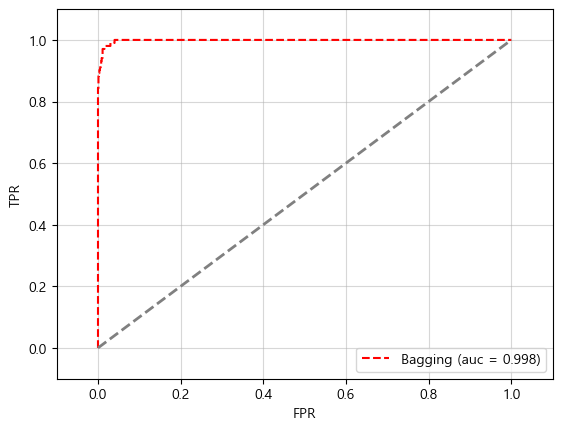

In [ ]:
# 모델 예측
y_pred = bagging.predict_proba(X_test)[:,1]

#ROC curve 그리기
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr, 'r--', label='%s (auc = %0.3f)'%('Bagging', roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [13]:
scores = cross_val_score(estimator=bagging, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("ROC AUC: %0.3f (+/- %0.3f) [%s]"%(scores.mean(),scores.std(),"Bagging"))

ROC AUC: 0.996 (+/- 0.004) [Bagging]


### **4-2. RandomForest**
- 결정나무(Decision Tree)를 여러개 만들어서 그 결과들을 종합적으로 고려하여 결론을 도출하는 방법
- 모든 특성을 고려하여 분할하는 기존의 bagging과 다르게 각 노드에서 사용할 특성을 무작위로 선택하여 트리 분할
> 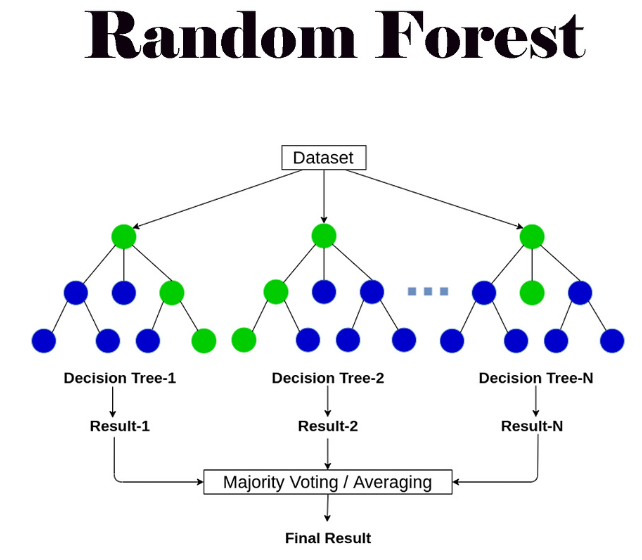

**(1) 모델 생성**

In [17]:
forest = RandomForestClassifier(criterion='gini',
                           n_estimators=500,
                           random_state=1)
# 모델 학습
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

**(2) confusion matrix**

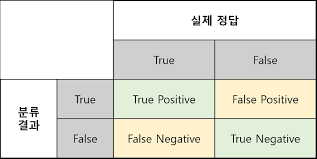

<Axes: >

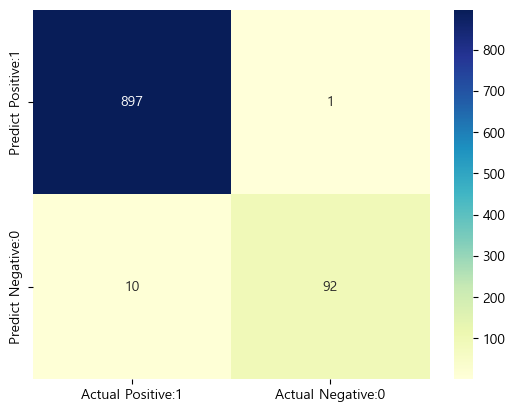

In [20]:
# 모델 예측
y_pred = forest.predict(X_test)

# Confusion Matrix 출력
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [21]:
print('잘못 분류된 샘플 개수 : %d'%(y_test != y_pred).sum())
print('정확도 : %.3f'%accuracy_score(y_test, y_pred))
print('정밀도 : %.3f'%precision_score(y_true=y_test, y_pred=y_pred))
print('재현율 : %.3f'%recall_score(y_true=y_test, y_pred=y_pred))
print('F1 : %.3f'%f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수 : 11
정확도 : 0.989
정밀도 : 0.989
재현율 : 0.902
F1 : 0.944


**(3) ROC curve AUC 검정**

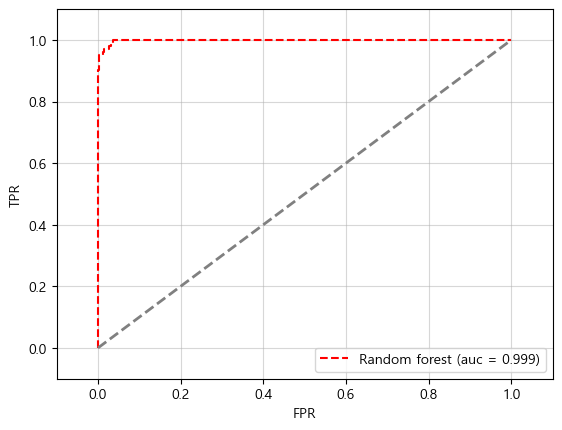

In [ ]:
# 모델 예측
y_pred = forest.predict_proba(X_test)[:,1]
# ROC curve 그리기
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr, 'r--', label='%s (auc = %0.3f)'%('Random forest', roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [18]:
scores = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("ROC AUC: %0.3f (+/- %0.3f) [%s]"%(scores.mean(),scores.std(),"Random forest"))

ROC AUC: 0.998 (+/- 0.002) [Random forest]


**(4) 특성 중요도**
- 각 특성이 얼마나 중요한지를 나타내는 지표
- 특정 특성이 목표 변수에 미치는 영향을 평가하는 데 사용

 1) Income                         0.344349
 2) CCAvg                          0.171357
 3) Education_Under                0.147365
 4) Family                         0.113966
 5) CDAccount                      0.050897
 6) Education_Prof                 0.039615
 7) Mortgage                       0.038253
 8) Experience                     0.037672
 9) Age                            0.036862
10) Online                         0.007669
11) CreditCard                     0.007665
12) SecuritiesAccount              0.004330


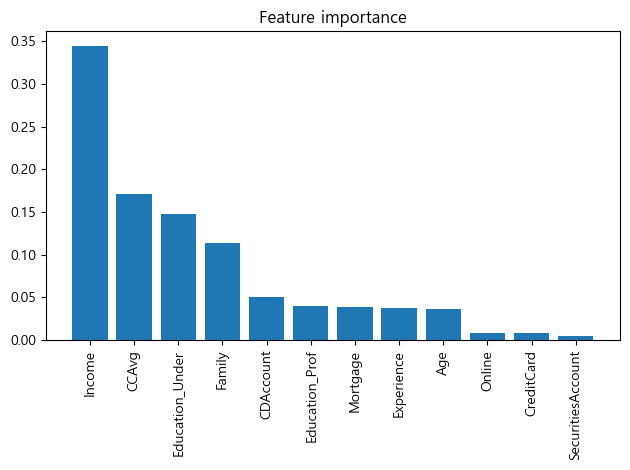

In [22]:
feat_labels = data.columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1, 30, feat_labels[indices[f]],
                         importances[indices[f]]))
    
plt.title("Feature importance")
plt.bar(range(X_train.shape[1]),
             importances[indices],
             align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()
#변수와의 관계성에 대한 내용도 같이 설명하면 좋을듯
# 해석적인 측면

### **4-3. AdaBoost**
- Boosting이란?
    - 무작위로 선택하는 것 보다 약간 가능성이 높은 분류기 (weak classifier)를 결합시켜서 강한 분류기를 만들어 내는 것
    - 병렬 형태로 모델을 결합하는 bagging과 다르게 새로운 분류기를 학습할 때마다 이전의 틀린 데이터인 weighted data를 이용
    > 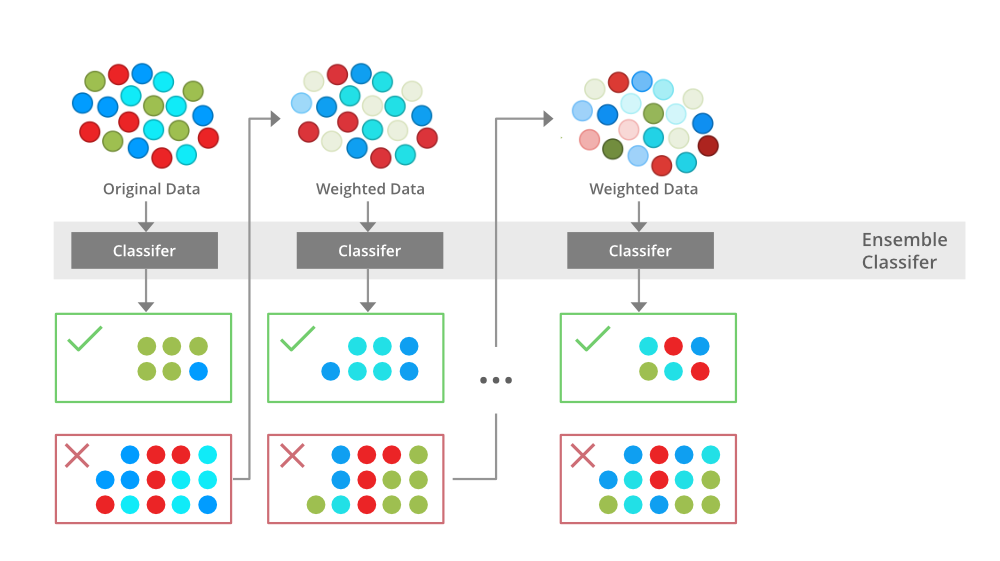
  
  
- AdaBoost이란?
    - 기존 부스팅 기법의 발전된 알고리즘
    - 최종 모델을 개별 분류기의 단순 앙상블로 만드는 기존 boosting기법과 다르게 학습에 이용된 개별 분류기에 서로 다른 가중치를 주어서 최종 분류기를 생성
    > step 1.
    >  
    >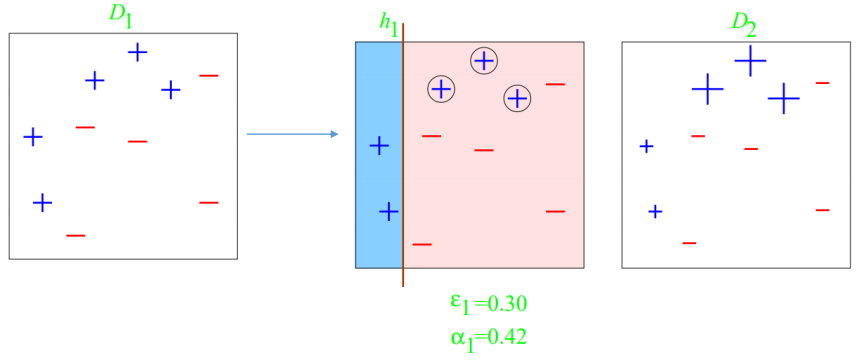
    >  
    > step 2.
    >  
    >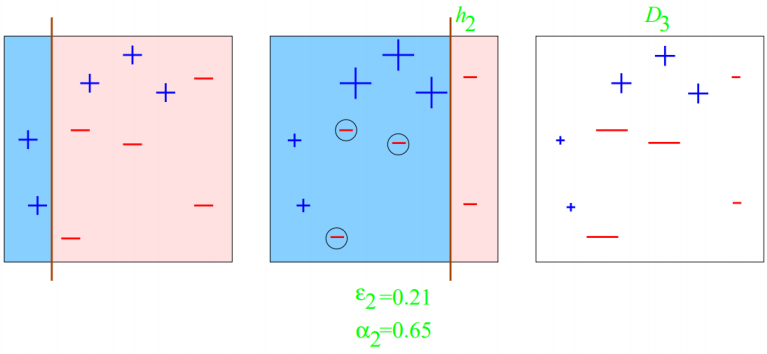
    >  
    > step 3.
    >  
    >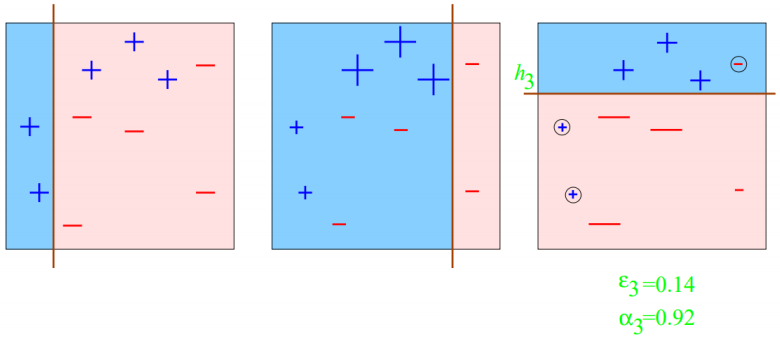
    >  
    > step 4.
    >  
    >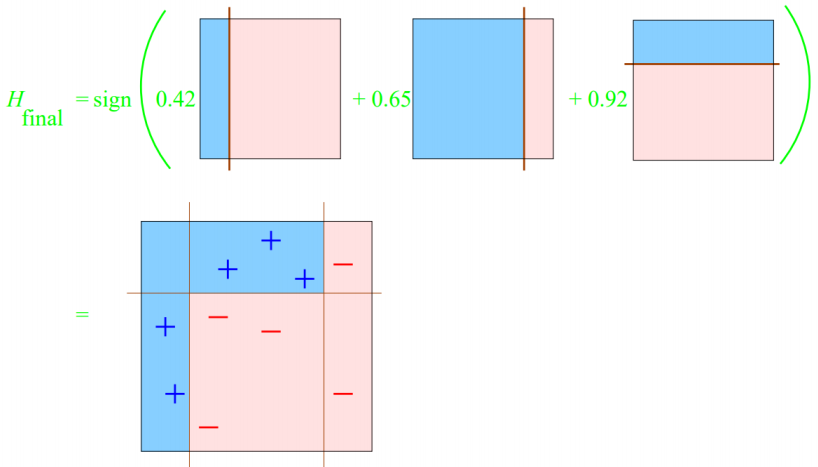

**(1) 모델 생성**

In [23]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(),
                                n_estimators=500,
                                learning_rate = 0.1,
                                random_state=1)
# 모델 학습
adaboost.fit(X_train, y_train)
# 모델 예측
y_pred = adaboost.predict(X_test)

**(2) confusion matrix**

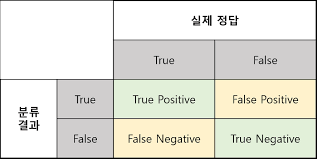

<Axes: >

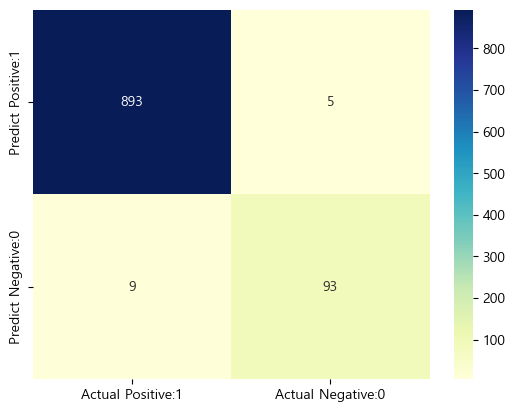

In [26]:
# 모델 예측
y_pred = adaboost.predict(X_test)

# Confusion Matrix 출력
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [27]:
print('잘못 분류된 샘플 개수 : %d'%(y_test != y_pred).sum())
print('정확도 : %.3f'%accuracy_score(y_test, y_pred))
print('정밀도 : %.3f'%precision_score(y_true=y_test, y_pred=y_pred))
print('재현율 : %.3f'%recall_score(y_true=y_test, y_pred=y_pred))
print('F1 : %.3f'%f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수 : 14
정확도 : 0.986
정밀도 : 0.949
재현율 : 0.912
F1 : 0.930


**(3) ROC curve AUC 검정**

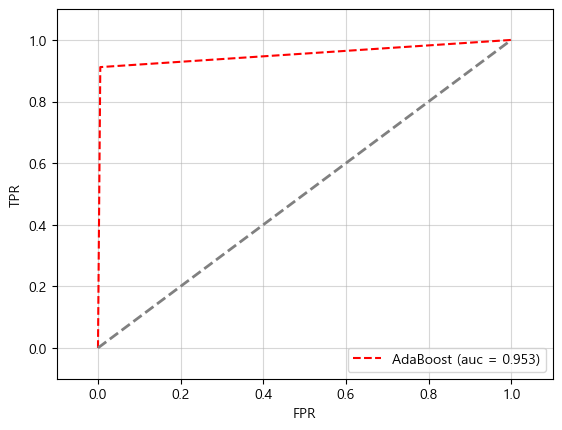

In [ ]:
y_pred = adaboost.predict_proba(X_test)[:,1]
# ROC curve 그리기
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr, 'r--', label='%s (auc = %0.3f)'%('AdaBoost', roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [24]:
scores = cross_val_score(estimator=adaboost, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("ROC AUC: %0.3f (+/- %0.3f) [%s]"%(scores.mean(),scores.std(),"AdaBoost"))

ROC AUC: 0.940 (+/- 0.032) [AdaBoost]


### **4-4. Gradient Boosting**
- 이전 모델의 잔차가 줄어드는 방향으로 weak learner를 학습시켜 boosting 하는 모델
  
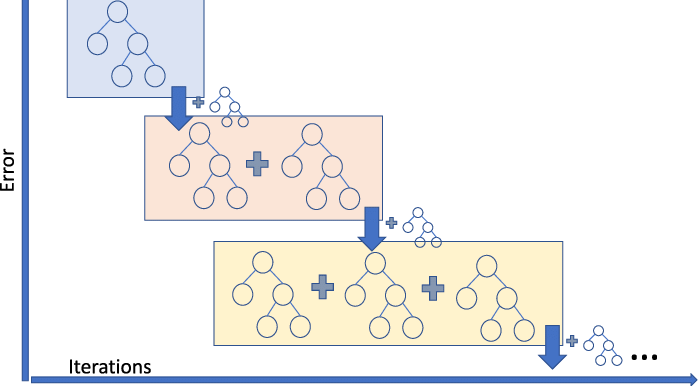

**(1) 모델 생성**

In [28]:
gbm = GradientBoostingClassifier(n_estimators=500,
                                learning_rate = 0.1,
                                random_state=1)
# 모델 학습
gbm.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500, random_state=1)

**(2) confusion matrix**

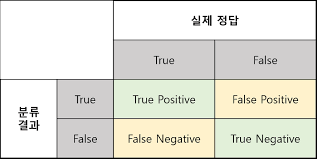

<Axes: >

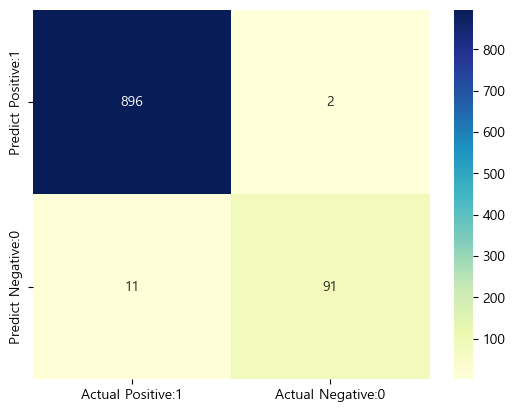

In [31]:
# 모델 예측
y_pred = gbm.predict(X_test)

# Confusion Matrix 출력
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [32]:
print('잘못 분류된 샘플 개수 : %d'%(y_test != y_pred).sum())
print('정확도 : %.3f'%accuracy_score(y_test, y_pred))
print('정밀도 : %.3f'%precision_score(y_true=y_test, y_pred=y_pred))
print('재현율 : %.3f'%recall_score(y_true=y_test, y_pred=y_pred))
print('F1 : %.3f'%f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수 : 13
정확도 : 0.987
정밀도 : 0.978
재현율 : 0.892
F1 : 0.933


**(3) ROC curve AUC 검정**

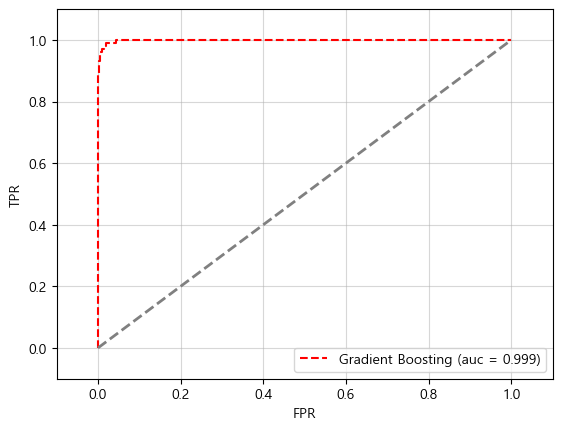

In [30]:
# 모델 예측
y_pred = gbm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr, 'r--', label='%s (auc = %0.3f)'%('Gradient Boosting', roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [29]:
scores = cross_val_score(estimator=gbm, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("ROC AUC: %0.3f (+/- %0.3f) [%s]"%(scores.mean(),scores.std(),"Gradient Boosting"))

ROC AUC: 0.997 (+/- 0.003) [Gradient Boosting]


### **4-5. XGBoost**
- 기존 Gradient Boosting 모델의 하이퍼파라미터 튜닝에 대한 복잡성을 보완하고자 나온 모델
- Gadient Boostingdp 병렬처리를 추가한 모델
  
  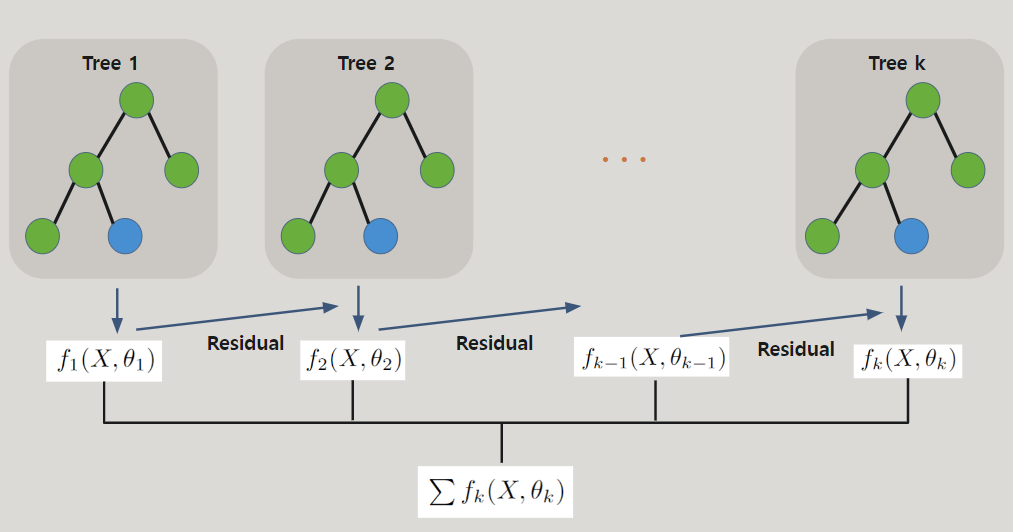

**(1) 모델 생성**

In [33]:
xgb =  XGBClassifier(n_estimators=500,
                     learning_rate = 0.1,
                     random_state=1)
# 모델 학습
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

**(2) confusion matrix**

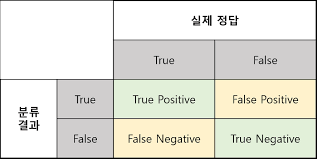

<Axes: >

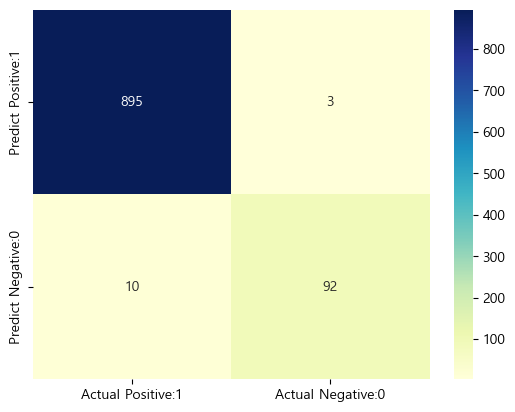

In [36]:
# 모델 예측
y_pred = xgb.predict(X_test)#### matrix로 검정

# Confusion Matrix 출력
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [37]:
print('잘못 분류된 샘플 개수 : %d'%(y_test != y_pred).sum())
print('정확도 : %.3f'%accuracy_score(y_test, y_pred))
print('정밀도 : %.3f'%precision_score(y_true=y_test, y_pred=y_pred))
print('재현율 : %.3f'%recall_score(y_true=y_test, y_pred=y_pred))
print('F1 : %.3f'%f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수 : 13
정확도 : 0.987
정밀도 : 0.968
재현율 : 0.902
F1 : 0.934


**(3) ROC curve AUC 검정**

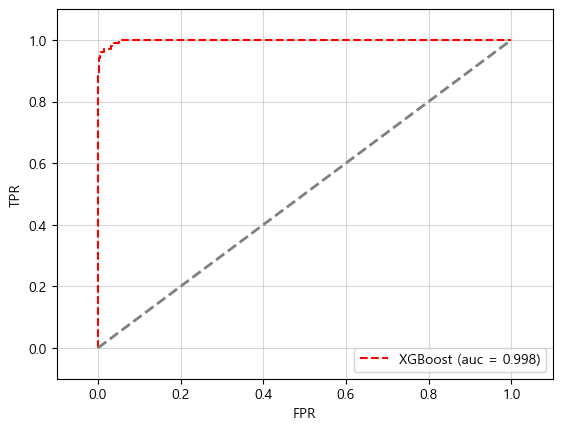

In [35]:
# 모델 예측
y_pred = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr, 'r--', label='%s (auc = %0.3f)'%('XGBoost', roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [34]:
scores = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("ROC AUC: %0.3f (+/- %0.3f) [%s]"%(scores.mean(),scores.std(),"XGBoost"))

ROC AUC: 0.997 (+/- 0.001) [XGBoost]


### **4-6. LightGBM**
- xgboost의 효율성 문제를 보완한 모델
- 기존 Gradient Boosting 모델들은 균형 트리 분할을 사용 -> LightGBM은 리프 중심의 트리 분할을 사용
    - 대부분의 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할 사용(이러한 균형을 맞추기에는 시간이 오래 걸림)
    - 리프 중심 트리 분할은 최대 손실값을 가지는 리프 노드를 지속적으로 분할해 트리가 깊어지고, 비대칭적인 규칙 트리가 생성됨
    > 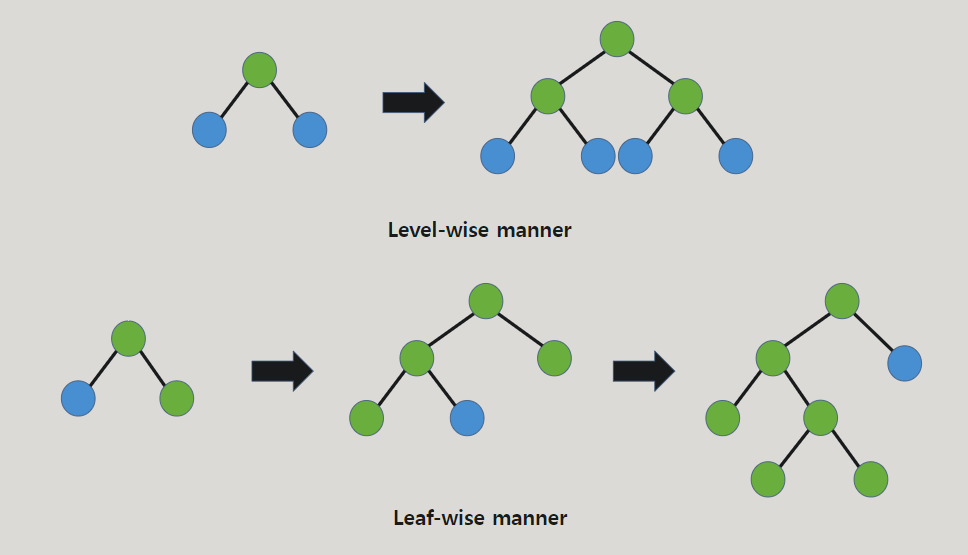

**(1) 모델 생성**

In [38]:
lgb = LGBMClassifier(n_estimators=500,
                     learning_rate = 0.1,
                     random_state=1)
# 모델 학습
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 378, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094500 -> initscore=-2.259887
[LightGBM] [Info] Start training from score -2.259887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMClassifier(n_estimators=500, random_state=1)

**(2) confusion matrix**

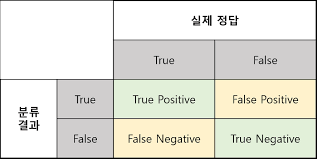

<Axes: >

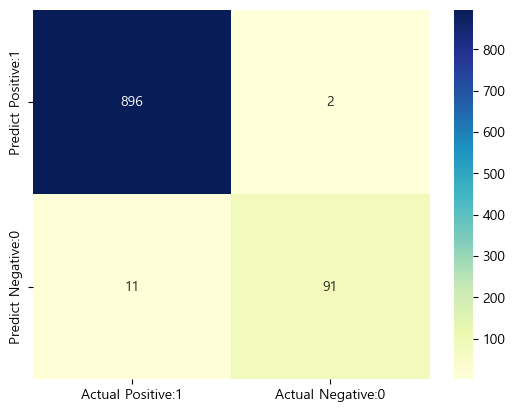

In [41]:
# 모델 예측
y_pred = lgb.predict(X_test)

# Confusion Matrix 출력
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [42]:
print('잘못 분류된 샘플 개수 : %d'%(y_test != y_pred).sum())
print('정확도 : %.3f'%accuracy_score(y_test, y_pred))
print('정밀도 : %.3f'%precision_score(y_true=y_test, y_pred=y_pred))
print('재현율 : %.3f'%recall_score(y_true=y_test, y_pred=y_pred))
print('F1 : %.3f'%f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수 : 13
정확도 : 0.987
정밀도 : 0.978
재현율 : 0.892
F1 : 0.933


**(3) ROC curve AUC 검정**

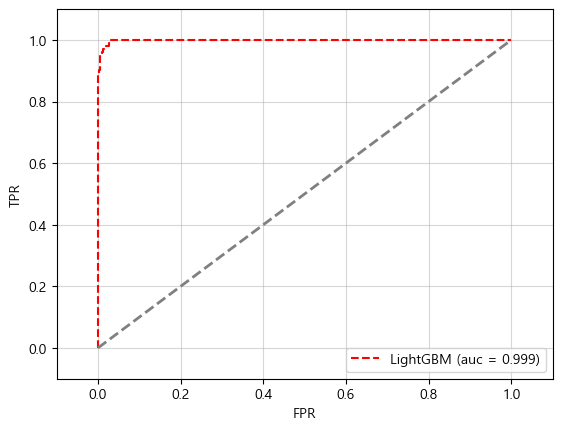

In [40]:
# 모델 예측
y_pred = lgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr, 'r--', label='%s (auc = %0.3f)'%('LightGBM', roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [39]:
scores = cross_val_score(estimator=lgb, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("ROC AUC: %0.3f (+/- %0.3f) [%s]"%(scores.mean(),scores.std(),"LightGBM"))

[LightGBM] [Info] Number of positive: 341, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 3600, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094722 -> initscore=-2.257293
[LightGBM] [Info] Start training from score -2.257293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

### **4-7. CatBoost**
- Gradient Boosting 기법 중 하나이며, 주로 범주형 데이터를 처리하는데 최적화된 모델
- 일부 데이터를 통해 잔차를 계산한 뒤, 모델을 생성 -> 나머지 데이터의 잔차를 해당 모델을 통해 예측하여 사용
  
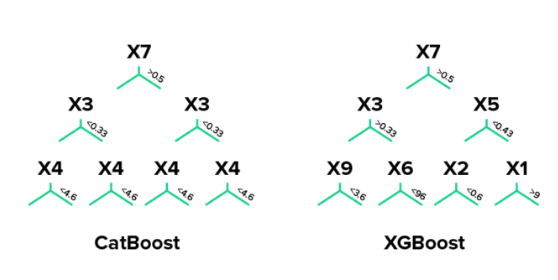

**(1) 모델 생성**

In [43]:
catb = CatBoostClassifier(n_estimators=500,
                                learning_rate = 0.1,
                                random_state=1)
# 모델 학습
catb.fit(X_train, y_train)

0:	learn: 0.5008759	total: 162ms	remaining: 1m 20s
1:	learn: 0.3710680	total: 167ms	remaining: 41.6s
2:	learn: 0.2737573	total: 173ms	remaining: 28.6s
3:	learn: 0.2209783	total: 178ms	remaining: 22.1s
4:	learn: 0.1645910	total: 183ms	remaining: 18.2s
5:	learn: 0.1377840	total: 189ms	remaining: 15.6s
6:	learn: 0.1058176	total: 194ms	remaining: 13.7s
7:	learn: 0.0833386	total: 200ms	remaining: 12.3s
8:	learn: 0.0698396	total: 206ms	remaining: 11.2s
9:	learn: 0.0603840	total: 211ms	remaining: 10.4s
10:	learn: 0.0544750	total: 217ms	remaining: 9.65s
11:	learn: 0.0522274	total: 224ms	remaining: 9.09s
12:	learn: 0.0467556	total: 229ms	remaining: 8.59s
13:	learn: 0.0449364	total: 237ms	remaining: 8.21s
14:	learn: 0.0417248	total: 243ms	remaining: 7.87s
15:	learn: 0.0388109	total: 250ms	remaining: 7.56s
16:	learn: 0.0375864	total: 257ms	remaining: 7.3s
17:	learn: 0.0355877	total: 263ms	remaining: 7.05s
18:	learn: 0.0342386	total: 271ms	remaining: 6.85s
19:	learn: 0.0333015	total: 277ms	remaini

**(2) confusion matrix**

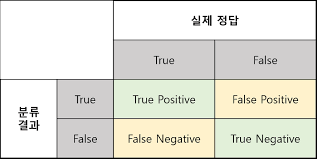

<Axes: >

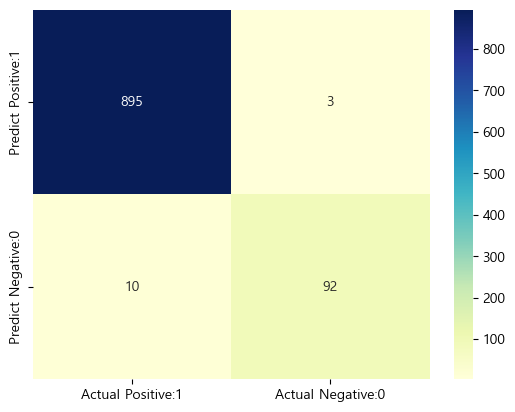

In [46]:
# 모델 예측
y_pred = catb.predict(X_test)#### matrix로 검정

# Confusion Matrix 출력
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [47]:
print('잘못 분류된 샘플 개수 : %d'%(y_test != y_pred).sum())
print('정확도 : %.3f'%accuracy_score(y_test, y_pred))
print('정밀도 : %.3f'%precision_score(y_true=y_test, y_pred=y_pred))
print('재현율 : %.3f'%recall_score(y_true=y_test, y_pred=y_pred))
print('F1 : %.3f'%f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수 : 13
정확도 : 0.987
정밀도 : 0.968
재현율 : 0.902
F1 : 0.934


**(3) ROC curve AUC 검정**

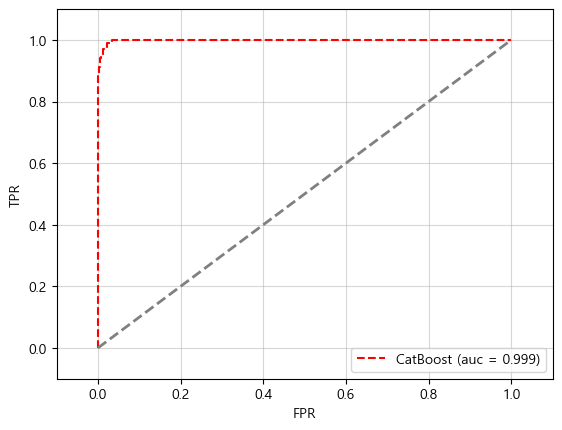

In [45]:
# 모델 예측
y_pred = catb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr, 'r--', label='%s (auc = %0.3f)'%('CatBoost', roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [44]:
scores = cross_val_score(estimator=catb, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("ROC AUC: %0.3f (+/- %0.3f) [%s]"%(scores.mean(),scores.std(),"CatBoost"))

0:	learn: 0.4998142	total: 10.8ms	remaining: 5.4s
1:	learn: 0.3705724	total: 19.1ms	remaining: 4.75s
2:	learn: 0.2715899	total: 24.9ms	remaining: 4.12s
3:	learn: 0.2184985	total: 32ms	remaining: 3.96s
4:	learn: 0.1624669	total: 38ms	remaining: 3.76s
5:	learn: 0.1350606	total: 46.9ms	remaining: 3.86s
6:	learn: 0.1023218	total: 52.5ms	remaining: 3.7s
7:	learn: 0.0809384	total: 58.7ms	remaining: 3.61s
8:	learn: 0.0686906	total: 65.3ms	remaining: 3.56s
9:	learn: 0.0592552	total: 71.2ms	remaining: 3.49s
10:	learn: 0.0534788	total: 78.4ms	remaining: 3.48s
11:	learn: 0.0491563	total: 83.9ms	remaining: 3.41s
12:	learn: 0.0441586	total: 91.3ms	remaining: 3.42s
13:	learn: 0.0415829	total: 96.8ms	remaining: 3.36s
14:	learn: 0.0386681	total: 102ms	remaining: 3.3s
15:	learn: 0.0360653	total: 109ms	remaining: 3.3s
16:	learn: 0.0346205	total: 114ms	remaining: 3.25s
17:	learn: 0.0333290	total: 122ms	remaining: 3.26s
18:	learn: 0.0319842	total: 127ms	remaining: 3.22s
19:	learn: 0.0310567	total: 135ms	r

## **5.  7개 모델 비교**

**(1) AUC 검정**

In [48]:
clf_labels = ["Bagging", "Random forest", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM", 'CatBoost']
all_clf = [bagging, forest, adaboost, gbm, xgb, lgb, catb]

In [49]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                            X=X_train,
                            y=y_train,
                            cv=10,
                            scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]"%(scores.mean(),scores.std(), label))

ROC AUC: 0.996 (+/- 0.004) [Bagging]
ROC AUC: 0.998 (+/- 0.002) [Random forest]
ROC AUC: 0.940 (+/- 0.032) [AdaBoost]
ROC AUC: 0.997 (+/- 0.003) [Gradient Boosting]
ROC AUC: 0.997 (+/- 0.001) [XGBoost]
[LightGBM] [Info] Number of positive: 341, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 3600, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094722 -> initscore=-2.257293
[LightGBM] [Info] Start training from score -2.257293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Info] Number of positive: 378, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094500 -> initscore=-2.259887
[LightGBM] [Info] Start training from score -2.259887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

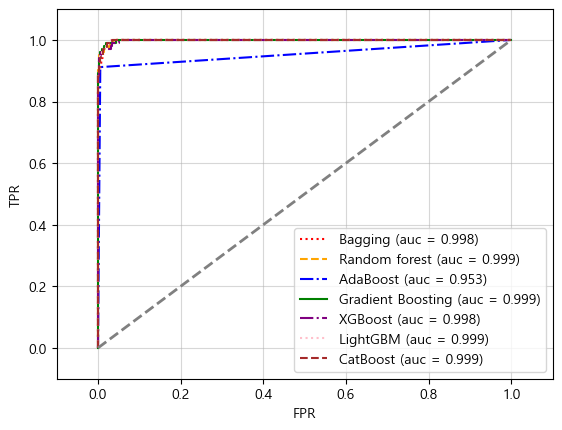

In [50]:
colors = ['red','orange','blue','green','purple','pink','brown']
linestyles = [':','--','-.','-','-.',':','--']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                    y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.3f)'%(label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],
        linestyle='--',
        color='gray',
        linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()